In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sb
plt.rcParams['figure.dpi'] = 200

### Seaborn heatmap
> https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

array([ 0,  5, 10, 15])

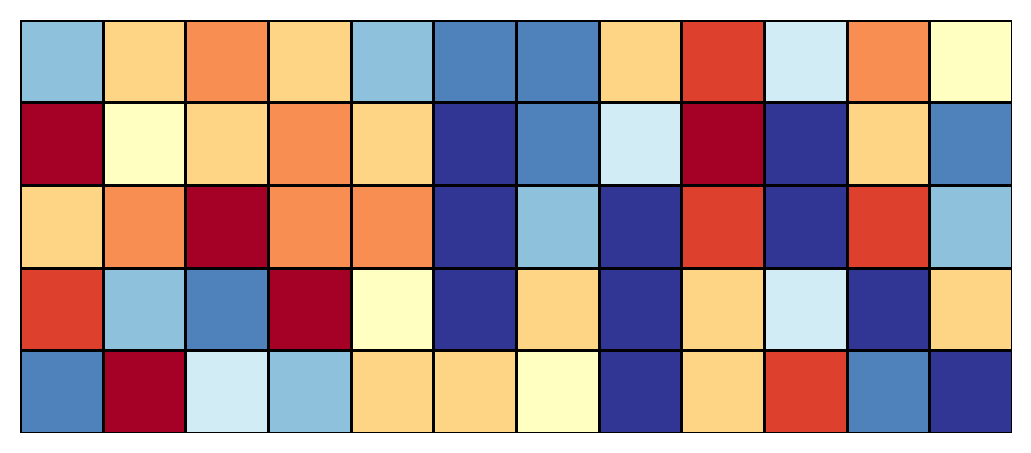

In [30]:
np.random.seed(80)
data=np.random.randint(0,9,(5,12))
#square 格子正方形
sb.heatmap(data=data,square=True,linecolor=(0,0,0),cmap='RdYlBu',
           cbar=False,xticklabels=False,yticklabels=False
           ,linewidths=0.4)

# 提取行向量
data[[0],:]
# 提取列向量
data[:,[0]]
# diagonal 对角
sqrt=np.arange(16).reshape((4,4))
np.diag(sqrt)


<Axes: >

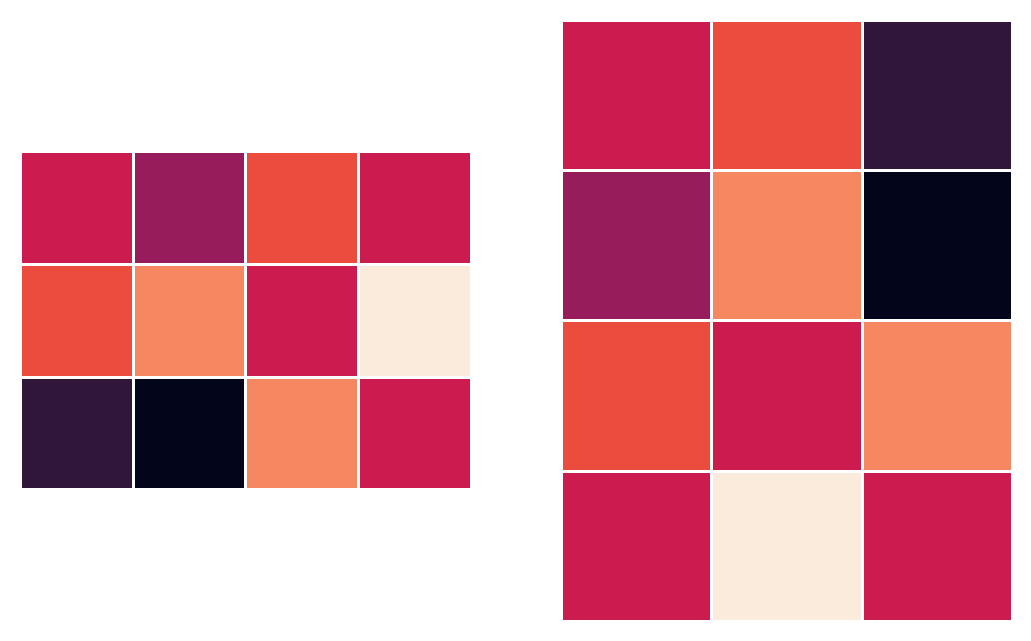

In [40]:
# 举证转置
mat=np.random.randint(0,9,(3,4))
fig,ax=plt.subplots(1,2)
sb.heatmap(mat,linecolor='w',linewidths=0.4,xticklabels=False
           ,yticklabels=False,square=True,cbar=False,ax=ax[0])
sb.heatmap(mat.T,linecolor='w',linewidths=0.4,xticklabels=False
           ,yticklabels=False,square=True,cbar=False,ax=ax[1])

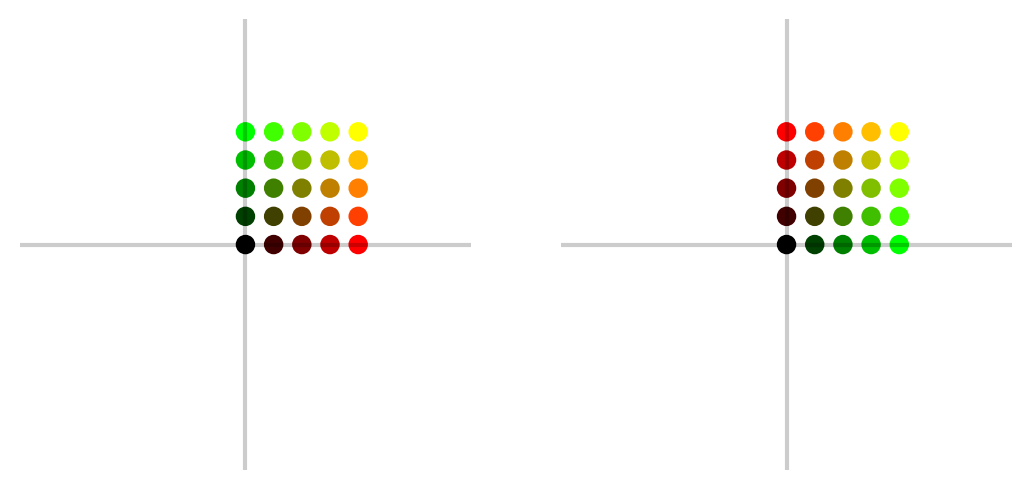

In [ ]:
# 2维矩阵变化
fig,ax=plt.subplots(1,2)
idx=np.linspace(0,1,5)
x,y=np.meshgrid(idx,idx)
z=np.zeros_like(x)
colors=np.row_stack([x.ravel(),y.ravel(),z.ravel()]).T
ax[0].scatter(x,y,c=colors)
ax[0].set_aspect('equal')
ax[0].set_xlim([-2,2])
ax[0].set_ylim([-2,2])
ax[0].axhline(0,0,c=(0,0,0),alpha=0.2)
ax[0].axvline(0,0,c=(0,0,0),alpha=0.2)
ax[0].set_axis_off()
B=np.row_stack([x.ravel(),y.ravel()])
A=np.array([[0,1],
           [1,0]])
C=A@B

ax[1].scatter(C[0,:],C[1,:],c=colors)
ax[1].set_aspect('equal')
ax[1].set_xlim([-2,2])
ax[1].set_ylim([-2,2])
ax[1].axhline(0,0,c=(0,0,0),alpha=0.2)
ax[1].axvline(0,0,c=(0,0,0),alpha=0.2)
ax[1].set_axis_off()

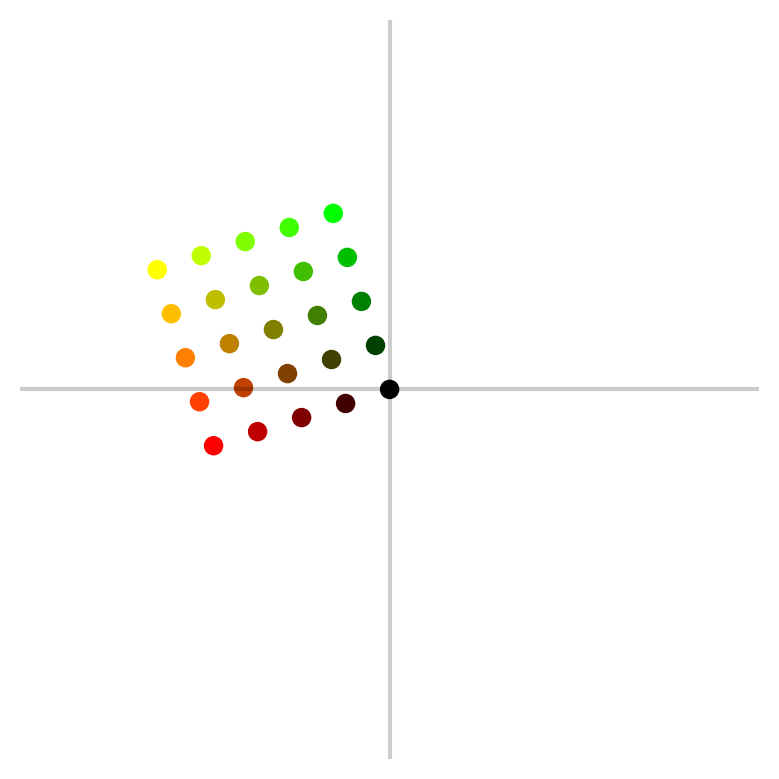

In [9]:
fig,ax=plt.subplots()
A_1=np.array([[np.cos(60),np.sin(60)]
             ,[np.sin(60),-np.cos(60) ]])
C_1=A_1@B
ax.scatter(C_1[0,:],C_1[1,:],c=colors)
ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.axhline(0,0,c=(0,0,0),alpha=0.2)
ax.axvline(0,0,c=(0,0,0),alpha=0.2)
ax.set_axis_off()


In [28]:
# 点积的方式
def matrix_multiplication1(A,B):
    A_n,A_m=A.shape
    B_n,B_m=B.shape
    if A_m !=B_n:
        raise("shape of matrix do not match")
    
    C=np.zeros((A_n,B_m))
    for n in range(A_n):
        for m in range(B_m):
            C[n,m]=np.dot(A[n,:],B[:,m])
    return C

A=np.random.randint(1,3,(2,2))
B=np.random.randint(1,3,(2,2))
matrix_multiplication1(A,B),A@B

(array([[2., 4.],
        [4., 8.]]),
 array([[2, 4],
        [4, 8]]))

In [33]:
# 外积的方式 A的列与B的行外积
def matrix_multiplication2(A,B):
    A_n,A_m=A.shape
    B_n,B_m=B.shape
    if A_m!=B_n:
        raise("matrix shape do not match")
    C=np.zeros((A_n,B_m))
    for m in range(A_m):
        # C=np.add(C,np.dot(A[:,m,None],B[None,m,:]))
        C=np.add(C,np.dot(A[:,[m]],B[[m],:]))
    return C
matrix_multiplication2(A,B),A@B

(array([[2., 4.],
        [4., 8.]]),
 array([[2, 4],
        [4, 8]]))

In [15]:
x=np.arange(-2,2)
y=np.arange(-2,2)
xx,yy=np.meshgrid(x,y)
xx,yy

(array([[-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1]]),
 array([[-2, -2, -2, -2],
        [-1, -1, -1, -1],
        [ 0,  0,  0,  0],
        [ 1,  1,  1,  1]]))

In [ ]:
# eye单位
arr=np.eye(3)
# diagonal  提取对角
arr.diagonal()

tri=np.array([[1,2,3],
              [2,1,4],
              [1,0,1]])
# 提取上三角矩阵
np.triu(tri)
# 提取下三角矩阵
np.tril(tri)

array([[1, 0, 0],
       [2, 1, 0],
       [1, 0, 1]])

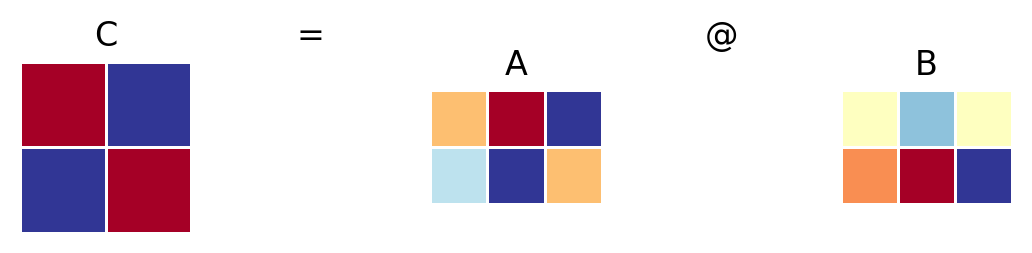

In [41]:
mat1=np.array([[1,0,3],
               [2,3,1]])
mat2=np.array([[1,2],
               [2,1]])
mat3=mat2@mat1
mat3
cmap='RdYlBu'
fig,ax=plt.subplots(1,5)
sb.heatmap(mat2,ax=ax[0],cmap=cmap,linewidths=1,square=True,cbar=False,xticklabels=False,yticklabels=False)
sb.heatmap(mat1,ax=ax[2],cmap=cmap,linewidths=1,square=True,cbar=False,xticklabels=False,yticklabels=False)
sb.heatmap(mat3,ax=ax[4],cmap=cmap,linewidths=1,square=True,cbar=False,xticklabels=False,yticklabels=False)

ax[0].title.set_text('C')

ax[1].title.set_text('=')
ax[1].set_axis_off()
ax[1].set_aspect('equal')

ax[2].title.set_text('A')

ax[3].title.set_text('@')
ax[3].set_axis_off()
ax[3].set_aspect('equal')

ax[4].title.set_text('B')

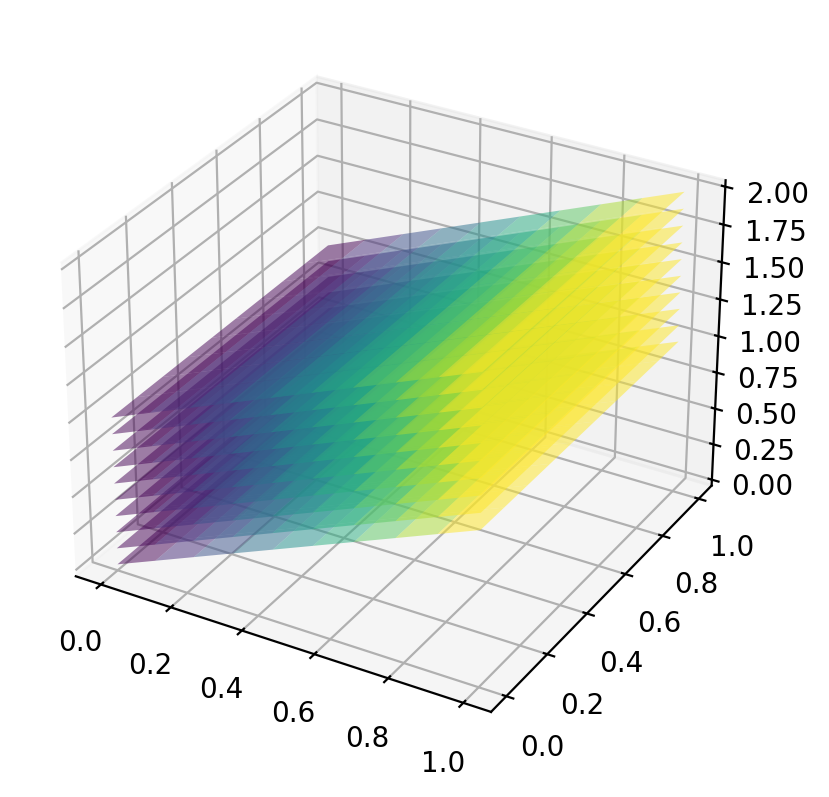

In [42]:
point = 10
x=np.linspace(0,1,point)
xx,yy=np.meshgrid(x,x)

fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
for z in np.linspace(0,1,point):
    zz=np.full_like(xx,z)
    # surface 基于平面高度来绘制cmap
    ax.plot_surface(xx,yy,zz+xx,alpha=0.5,cmap='viridis',linewidth=0.5,antialiased=True)

# ax.set_axis_off()


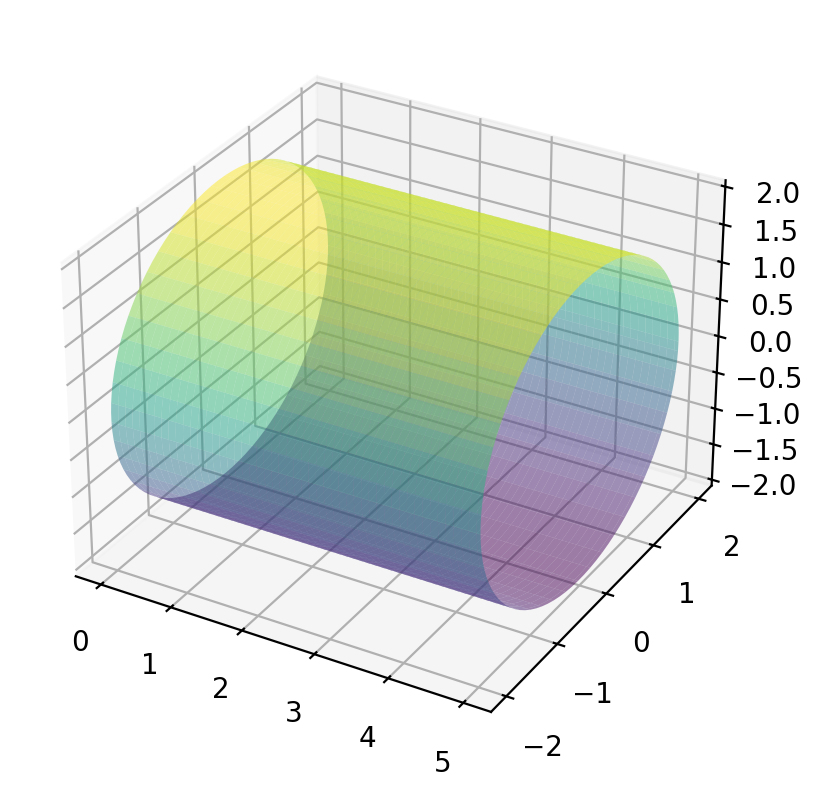

In [ ]:
# 找出不变的轴,其他轴通三角函数旋转
# (x, ycosθ, ysinθ)
r=np.linspace(0,5,100)
theta=np.linspace(0,2*np.pi,100)
R,theta=np.meshgrid(r,theta)
# R=2*R+2
# print(R)

fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
xx=R
yy=np.full_like(R,2)*np.cos(theta)
zz=np.full_like(R,2)*np.sin(theta)
ax.plot_surface(xx,yy,zz,alpha=0.5,cmap='viridis',linewidth=0.5,antialiased=True)

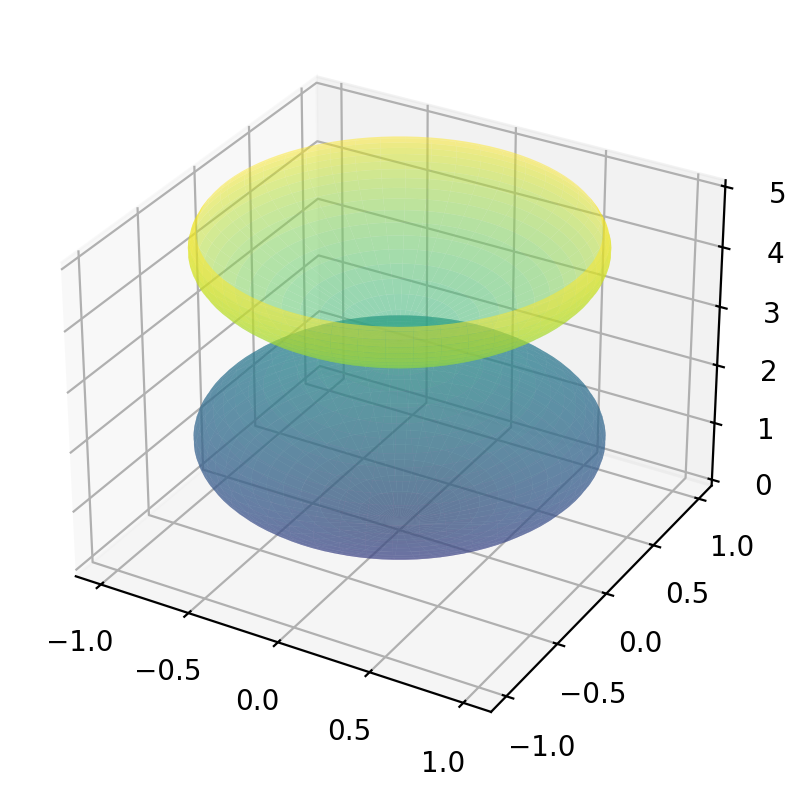

In [51]:
r=np.linspace(0,5,100)
theta=np.linspace(0,2*np.pi,100)
R,theta=np.meshgrid(r,theta)
zz=R
xx=np.sin(R)*np.cos(theta)
yy=np.sin(R)*np.sin(theta)
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(xx,yy,zz,alpha=0.5,cmap='viridis',linewidth=0.5,antialiased=True)

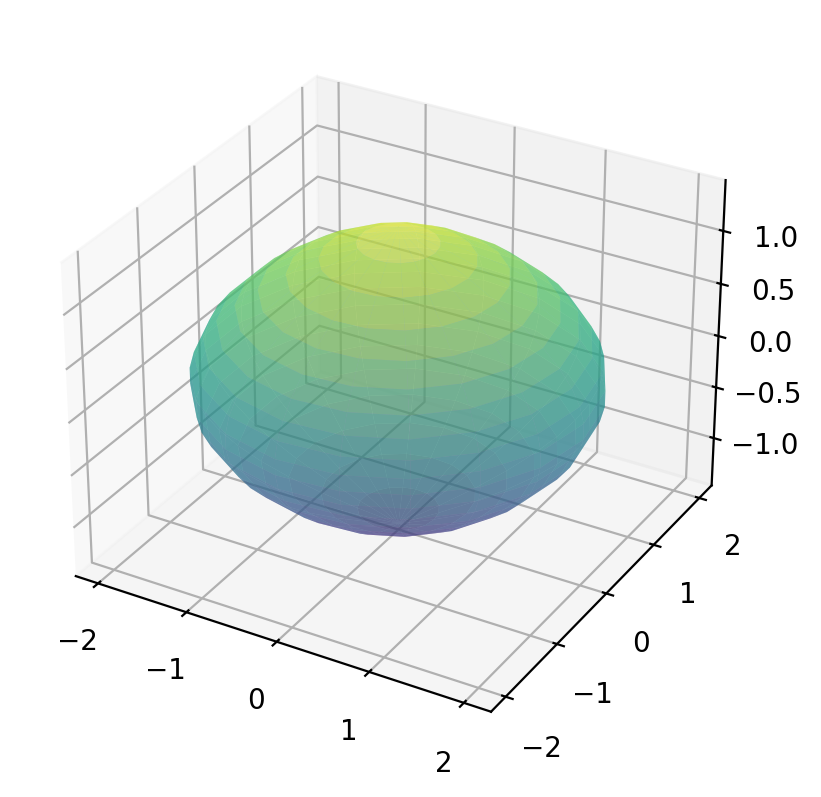

In [16]:
r=np.linspace(-np.sqrt(2),np.sqrt(2),20)
theta=np.linspace(0,2*np.pi,20)
R,T=np.meshgrid(r,theta)
# x=2/y
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
xx=(2-R**2)*np.cos(T)
yy=(2-R**2)*np.sin(T)
zz=R

ax.plot_surface(xx,yy,zz,alpha=0.5,cmap='viridis',linewidth=0.5,antialiased=True)
# ax.set_axis_off()